IRIS dataset classification using kNN

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#loading the iris dataset
flower_data = datasets.load_iris()
for i in flower_data:
  print(i)

data
target
target_names
DESCR
feature_names
filename


In [6]:
flower_data['data'].shape

(150, 4)

In [7]:
print("\nClasses of flowers in the dataset: ", flower_data.target_names)
print("\nFeatures of flowers in teh dataset: ", flower_data.feature_names)


Classes of flowers in the dataset:  ['setosa' 'versicolor' 'virginica']

Features of flowers in teh dataset:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
from google.colab import files
from IPython.display import Image


In [38]:
img = files.upload()

Saving download.png to download.png


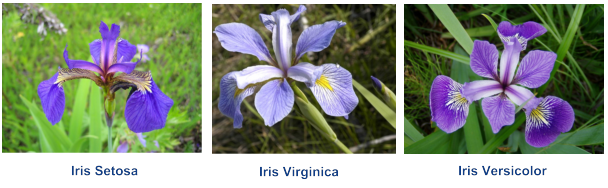

In [40]:
Image('download.png', width = 800)

In [8]:
df = pd.DataFrame(flower_data.data, columns= flower_data.feature_names)
df['target'] = flower_data.target
df['class'] = df['target'].map({ 0: flower_data.target_names[0], 1: flower_data.target_names[1], 2: flower_data.target_names[2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


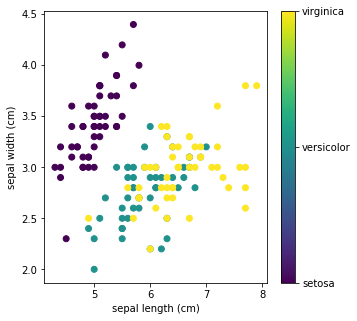

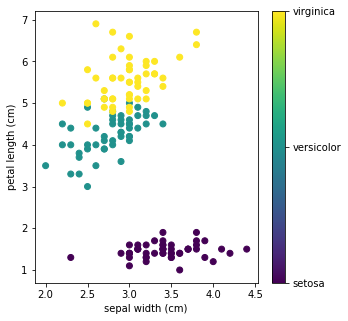

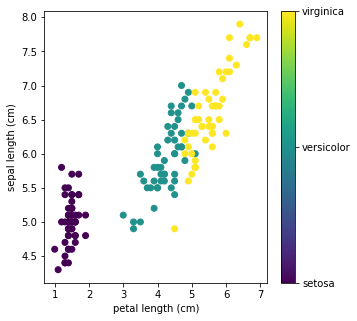

In [11]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
#choosing the features to be plotted for a 2-D graph 
#[0:'setosa', 1:'versicolor', 2:'virginica']
x_axis = 0
y_axis = 1

#labeling the colorbar with the target names
colorbar = plt.FuncFormatter(lambda x, *args: flower_data.target_names[int(x)])

plt.figure(figsize=(5, 5))
plt.scatter(flower_data.data[:, x_axis], flower_data.data[:, y_axis], c= flower_data.target)
plt.colorbar(ticks=[0, 1, 2], format=colorbar)
plt.xlabel(flower_data.feature_names[x_axis])
plt.ylabel(flower_data.feature_names[y_axis])

plt.show()

x_axis = 1
y_axis = 2

plt.figure(figsize=(5, 5))
plt.scatter(flower_data.data[:, x_axis], flower_data.data[:, y_axis], c= flower_data.target)
plt.colorbar(ticks=[0, 1, 2], format=colorbar)
plt.xlabel(flower_data.feature_names[x_axis])
plt.ylabel(flower_data.feature_names[y_axis])

plt.show()

x_axis = 2
y_axis = 0

plt.figure(figsize=(5, 5))
plt.scatter(flower_data.data[:, x_axis], flower_data.data[:, y_axis], c= flower_data.target)
plt.colorbar(ticks=[0, 1, 2], format=colorbar)
plt.xlabel(flower_data.feature_names[x_axis])
plt.ylabel(flower_data.feature_names[y_axis])


plt.show()


Classification using k-Nearest Neighbors

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [20]:
X = flower_data.data
Y = flower_data.target

#creating test and training sets from the iris dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 0) 

print(len(X_train), len(X_test))

112 38


In [26]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 9).fit(X_train, Y_train)

accuracy = kNN.score(X_test, Y_test)
print("\nAccuracy of classification= ", accuracy)


Accuracy of classification=  0.9736842105263158


In [27]:
predicted_classes = kNN.predict(X_test)
ConfMatx = confusion_matrix(Y_test, predicted_classes)
print(ConfMatx)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [29]:
## Precision is calculated as : tp / (tp + fp)
precision = precision_score(Y_test, predicted_classes, average= 'macro')
print("\nPrecision = ", precision)


Precision =  0.9666666666666667


In [30]:
## Recall is calculated as : tp / (tp + fn)
recall = recall_score(Y_test, predicted_classes, average= 'macro')
print("\nRecall = ", recall)


Recall =  0.9791666666666666


Testing for manual inputs

In [35]:
#trying a random flower feature
manual_input = ([[5.4, 2.1, 3.7, 1.6]])
prediction = kNN.predict(manual_input)
predicted_class = flower_data.target_names[prediction[0]]
print(f'\nThe prediction for the flower with features {manual_input} is : {predicted_class}')


The prediction for the flower with features [[5.4, 2.1, 3.7, 1.6]] is : versicolor
